## Numerical Experiments: Second-Layer Hessian

We consider the second-layer Hessian
$$H_2(\theta)=\frac{1}{n}\sum_{\ell=1}^n\phi(W^{(1)}x_\ell)\phi(W^{(1)}x_\ell)^\top\in\mathbb{R},$$
where $X,W^{(1)}$ are normal with i.i.d. entries and $\phi$ the nonlinearity. We also assume $W_{ij}\sim\mathcal{N}(0,1/d)$.
\
\
We compare the following two results numerically.

**Theorem (Piccolo-Schröder, 2021)** *Let $X$ and $W^{(1)}$ have centered i.i.d. entries with $\mathbb{E}[X_{ij}^2]=\sigma_x^2<\infty$ and $\mathbb{E}[W^{(1)}_{ij}]=\sigma_w^2$ such that the following tail conditions are satisfied: There exist $\vartheta_x,\vartheta_w>0$ and $\gamma>1$ such that for any $t>0$ we have*
$$P(|W^{(1)}_{ij}|>t)\leq e^{-\vartheta_wt^\gamma},\quad P(|X_{ij}|>t)\leq e^{-\vartheta_xt^\gamma}.$$
*Also, assume that the activation function $\phi:\mathbb{R}\to\mathbb{R}$ satisfies*
$$\int_{\mathbb{R}}\phi(\sigma_w\sigma_x\,x)\frac{e^{-x^2/2}}{\sqrt{2\pi}}\,dx=0$$
*and that there exists constants $C_\phi,c_\phi,A_0>0$ such that for any $A\geq A_0$ and $n\in\mathbb{N}$ we have*
$$\sup_{x\in[-A,A]}|\phi^{(n)}(x)|\leq C_\phi A^{c_\phi n}.$$
*Define the parameters*
$$\theta_1(\phi):=\frac{1}{\sqrt{2\pi}}\int_{\mathbb{R}}\phi(\sigma_w\sigma_x\,x)^2e^{-x^2/2}\,dx,\quad \theta_2(\phi):=\left(\frac{\sigma_w\sigma_x}{\sqrt{2\pi}}\int_{\mathbb{R}}\phi'(\sigma_w\sigma_x\,x)e^{-x^2/2}\,dx\right)^2.$$
*Furthermore, denote $m_{H_2}(z)$ to be the Stieltjes transform of the limiting spectral measure of the second-layer Hessian*
$$H_2(\theta)=\frac{1}{n}\phi(W^{(1)}X)\phi(W^{(1)}X)^\top,$$
*and assume that $n,d,d_1\to\infty$ with $n/d\to\alpha\in(1,\infty)$ and $d/d_1\to\psi\in(0,\infty)$. Then the Stieltjes transform $m_{H_2}(z)$ satisfies the fixed point equation*
$$
1+z\,m_{H_2}(z)-\left(1-\frac{1}{\alpha\psi}(1+z\,m_{H_2}(z))\right)\left(\theta_1(\phi)-\frac{\theta_2(\phi)}{\psi}(1+z\,m_{H_2}(z))\right)m_{H_2}(z)-\frac{\theta_2(\phi)\,(\theta_1(\phi)-\theta_2(\phi))}{\psi}\left(1-\frac{1}{\alpha\psi}(1+z\,m_{H_2}(z))\right)^2m_{H_2}(z)^2=0
$$
*for all $z\in\mathbb{C}_+$.*
\
\
**Theorem (Main Result II without Weights)** *Denote $Q_{d}(z)$ to be the resolvent of $Y$ and assume that there exists a Stieltjes transform $m$ (of some probability measure $\mu$) such that*
$$m_d(z):=\frac{1}{d}\operatorname{Tr}Q_{d}(z)\stackrel{a.s.}{\to}m(z)$$
*point-wise
for all $z\in\mathbb{C}_+$, $n/d\to\alpha\in(1,\infty)$ as $n,d\to\infty$.
Define the parameters $\mu_\phi:=\mathbb{E}[\phi(x_1)]=0$ and $\sigma_\phi^2:=\mathbb{E}[\phi(x_1)^2]<\infty$.
\smallskip
\\
Then the Stieltjes transform $m(z)$ satisfies the fixed point equation*
$$m(z)=\left(\frac{\sigma_\phi^2}{1+\frac{\sigma_\phi^2}{\alpha}m(z)}-z\right)^{-1}$$
*for all $z\in\mathbb{C}_+$.*

In [8]:
# INITIALIZATION

import numpy as np
from matplotlib import pyplot as plt
from scipy import linalg

def plotEmpirical(alpha, phi, d, bins, weights):
    n = int(alpha * d)
    X = np.random.normal(size=(d, n))

    if weights == True:
        W = 1/np.sqrt(d) * np.random.normal(0, 1, size=(d,d))
    else:
        W = np.identity(d)

    Y = phi(W @ X)
    H = 1/n * Y @ Y.T
    eigs = np.linalg.eigvalsh(H)
    plt.hist(eigs, bins=bins, density=True)
    plt.xlabel(r'$\lambda$')
    plt.ylabel(r'$\mu(d\lambda)$')
    return eigs.min(), eigs.max()

# reconstruct limiting spectral density
def plotDensity(alpha, psi, sigma, theta2, mu, title, xmin, xmax, weights):

    lambdas = np.linspace(xmin, xmax , num=1000)
    epsilons = np.logspace(4, -3, num=1000)
    m_values = 1

    for eps in epsilons: # fixed point equation
        if weights == True:
            m_values = - 1 / ((lambdas + eps*1j) - (sigma**2 - theta2*(1+(lambdas + eps*1j)*m_values)/psi)*(1 - (1+(lambdas + eps*1j)*m_values)/(alpha*psi)) - 
                            theta2*(sigma**2-theta2)/psi * m_values*(1 - (1+(lambdas + eps*1j)*m_values)/(psi*alpha))**2)
        else:
            #m_values = 1/(sigma**2 / (1 + sigma**2/(alpha*psi)*m_values) - (lambdas + eps*1j)) # for mu = 0
            m_values = 1/(sigma**2 / (1 + sigma**2/(alpha*psi)*m_values 
                            + mu**2/(alpha*psi)*g(lambdas + eps*1j, m_values, sigma**2, theta2, alpha, psi, mu)) - (lambdas + eps*1j))
 
    mu = np.imag(m_values) / np.pi # Stieltjes inversion

    plt.plot(lambdas, mu, color="red")
    plt.xlabel(r'$\lambda$')
    plt.ylabel(r'$\mu(d\lambda)$')
    plt.title(title)
    plt.xlim(xmin, xmax)
    plt.ylim(top=mu.max() * 1.1)

def g(z,m, theta1, theta2, alpha, psi, mu):
    return m # second "anti-trace"-term is missing -> discrepancy!

# single random Hessian generator (for Monte-Carlo Simulation)
def singleHessian(alpha, phi, d, weights):

    n = int(alpha * d)
    X = np.random.normal(size=(d,n))

    if weights == True:
        W = np.random.normal(0, 1, size=(d,d))
    else:
        W = np.identity(d)

    H = 0
    for l in range(1, n+1):
        v = phi(np.dot(W,X[:,l-1]))
        H += 1/n*np.outer(v,v)

    return H
    #return 1/n*np.dot(phi(np.dot(W,X)),phi(np.dot(W,X).T))

# generate multiple random samples of Hessians
def sampleHessians(N, alpha, phi, d, weights):

    r=[]

    for i in range(N):
        r.append(singleHessian(alpha, phi, d, weights))

    return np.array(r)

# generate empirical data
def plotEmpiricalMC(N, alpha, phi, d, weights):
    ee, ev = np.linalg.eigh(sampleHessians(N, alpha, phi, d, weights))
    nn, bb, _ = plt.hist(ee.ravel(), bins="auto", density=True)

    plt.xlabel(r'$\lambda$')
    plt.ylabel(r'$\mu(d\lambda)$')
    plt.ylim(top=nn[1:].max() * 1.1)
    return ee.min(), ee.max()

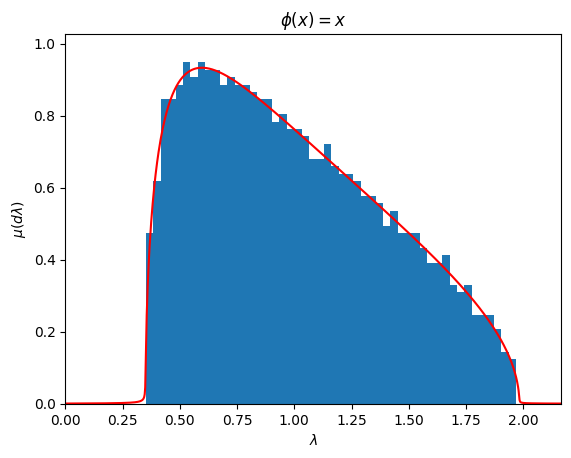

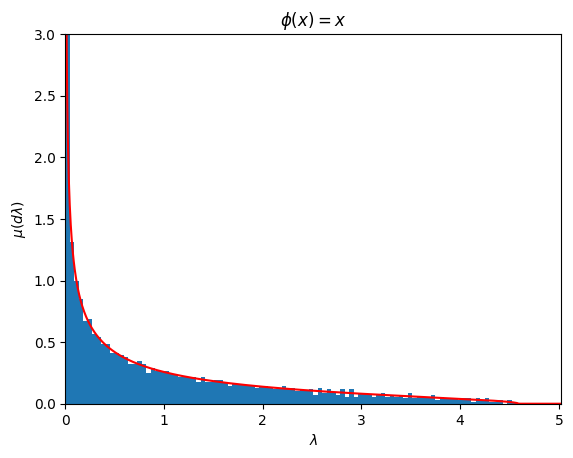

In [73]:
## testing for Identity

alpha = 6
psi = 1
d = 20
n = int(alpha * d)
N = 1500

## Example: Identity
phi = lambda x: x
sigma = 1
theta2 = 1
mu = 0

# Empirical Spectral Distribution
plt.figure(1)
xmin, xmax = plotEmpirical(alpha, phi, N, 50, False)
plotDensity(alpha, psi, sigma, theta2, mu, r'$\phi(x)=x$', 0, xmax*1.1, False)
plt.figure(2)
xmin, xmax = plotEmpirical(alpha, phi, N, 100, True)
plotDensity(alpha, psi, sigma, theta2, mu, r'$\phi(x)=x$', 0, xmax*1.1, True)
plt.ylim(0,3);

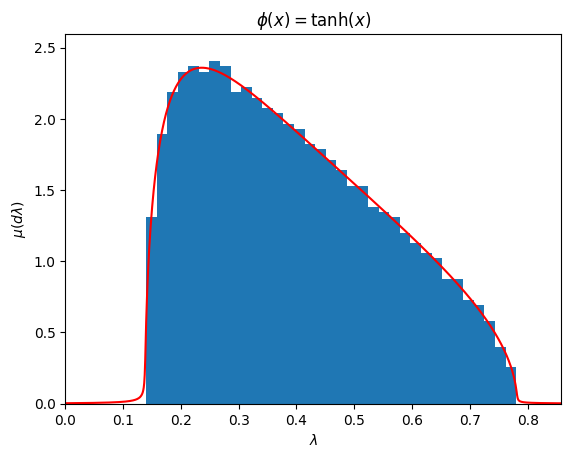

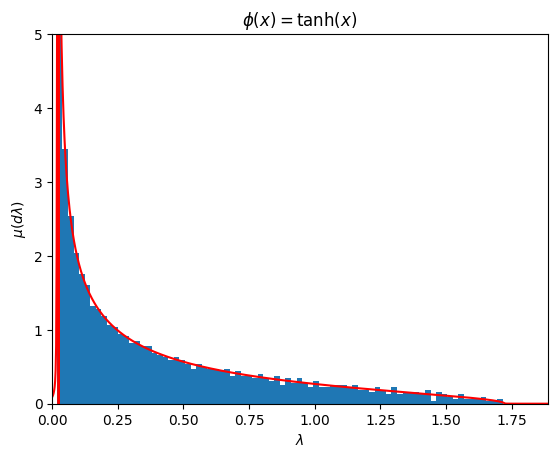

In [6]:
## testing for hyperbolic tangent

alpha = 6
psi = 1
d = 20
n = int(alpha * d)
N = 1500

## Example: Hyperbolic Tangent
phi = lambda x: np.tanh(x)
sigma = np.sqrt(0.394294) # computed from E[tanh(z)^2] for normal Gaussian z
theta2 = 0.605706**2
mu = 0

# Empirical Spectral Distribution
plt.figure(1)
xmin, xmax = plotEmpirical(alpha, phi, N, 35, False)
plotDensity(alpha, psi, sigma, theta2, mu, r'$\phi(x)=\tanh(x)$', 0, xmax*1.1, False)
plt.figure(2)
xmin, xmax = plotEmpirical(alpha, phi, N, 80, True)
plotDensity(alpha, psi, sigma, theta2, mu, r'$\phi(x)=\tanh(x)$', 0, xmax*1.1, True)
plt.ylim(0,5);

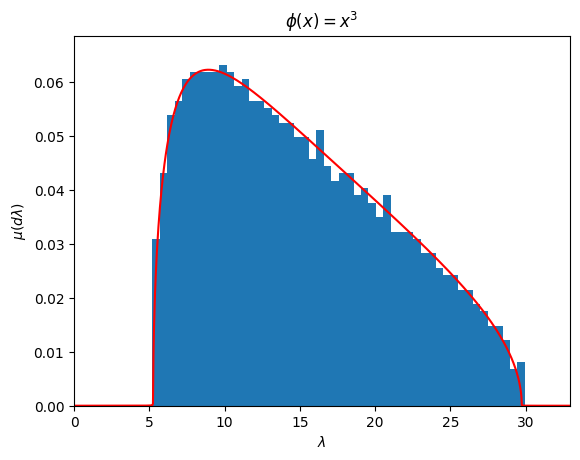

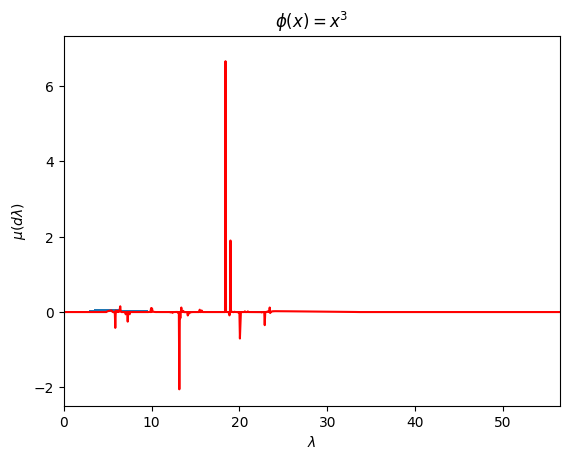

In [75]:
## testing for Cubic

alpha = 6
psi = 1
d = 20
n = int(alpha * d)
N = 1500

## Example: Cubic
phi = lambda x: x**3
sigma = np.sqrt(15)
theta2 = 3
mu = 0

# Empirical Spectral Distribution
plt.figure(1)
xmin, xmax = plotEmpirical(alpha, phi, N, 50, False)
plotDensity(alpha, psi, sigma, theta2, mu, r'$\phi(x)=x^3$', 0, xmax*1.1, False)
plt.figure(2)
xmin, xmax = plotEmpirical(alpha, phi, N, 80, True)
plotDensity(alpha, psi, sigma, theta2, mu, r'$\phi(x)=x^3$', 0, xmax*1.1, True)

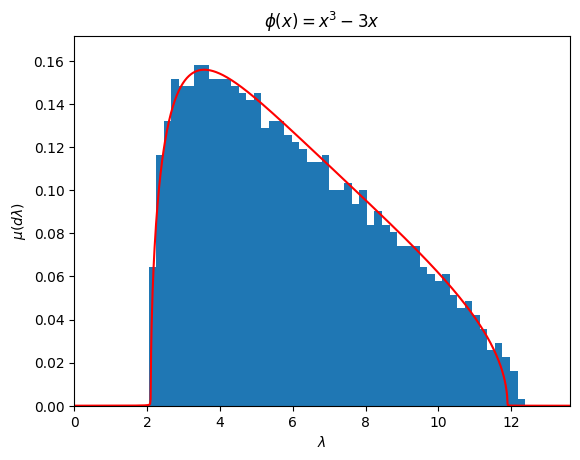

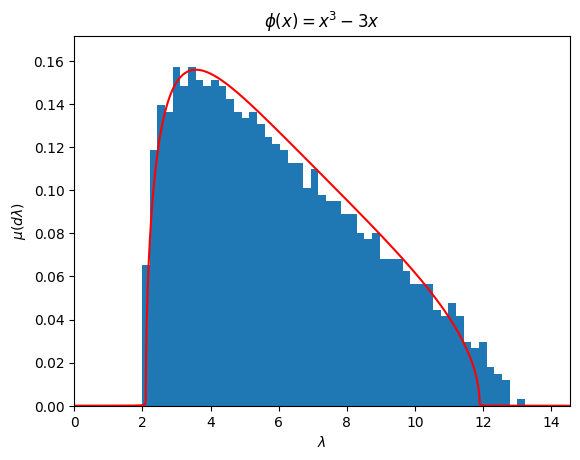

In [69]:
## testing for Cubic (from Péché)

alpha = 6
psi = 1
d = 20
n = int(alpha * d)
N = 1500

## Example: Cubic
phi = lambda x: x**3-3*x
sigma = np.sqrt(6)
theta2 = 0
mu = 0

# Empirical Spectral Distribution
plt.figure(1)
xmin, xmax = plotEmpirical(alpha, phi, N, 50, False)
plotDensity(alpha, psi, sigma, theta2, mu, r'$\phi(x)=x^3-3x$', 0 , xmax*1.1, False)
plt.figure(2)
xmin, xmax = plotEmpirical(alpha, phi, N, 50, True)
plotDensity(alpha, psi, sigma, theta2, mu, r'$\phi(x)=x^3-3x$', 0 , xmax*1.1, True)

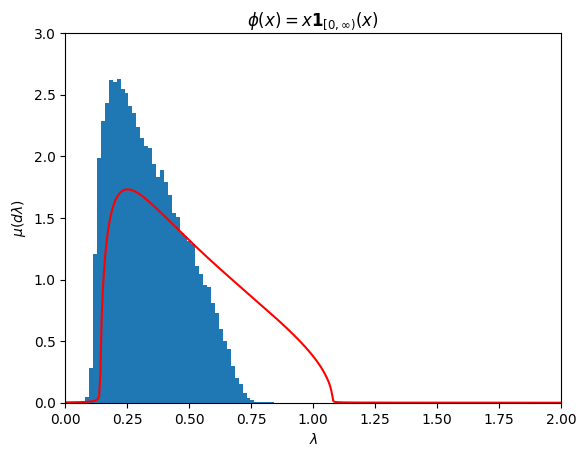

In [165]:
## testing for ReLU (with discrepany due to not fully accounting for g(z))

alpha = 6
psi = 1
d = 20
n = int(alpha * d)
N = 1500

## Example: ReLU
phi = lambda x: np.maximum(0,x)
sigma = np.sqrt(0.5)
theta2 = 0.5**2
mu = 1/np.sqrt(2*np.pi)

# Empirical Spectral Distribution
plt.figure(6)
xmin, xmax = plotEmpiricalMC(N, alpha, phi, d, False)
plotDensity(alpha, psi, sigma, theta2, mu, r'$\phi(x)=x\mathbf{1}_{[0,\infty)}(x)$', 0, xmax*1.1, False)
plt.ylim(0,3);
plt.xlim(0,2);

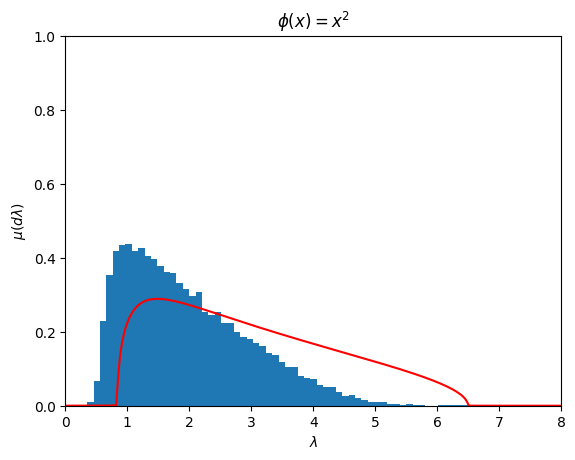

In [167]:
## testing for Quadratic (with discrepany due to not fully accounting for g(z))

alpha = 6
psi = 1
d = 20
n = int(alpha * d)
N = 1500

## Example: Quadratic
phi = lambda x: x**2
sigma = np.sqrt(3)
theta2 = 0
mu = 1

# Empirical Spectral Distribution
plt.figure(6)
xmin, xmax = plotEmpiricalMC(N, alpha, phi, d, False)
plotDensity(alpha, psi, sigma, theta2, mu, r'$\phi(x)=x^2$', 0, xmax*1.1, False)
plt.ylim(0,1);
plt.xlim(0,8);

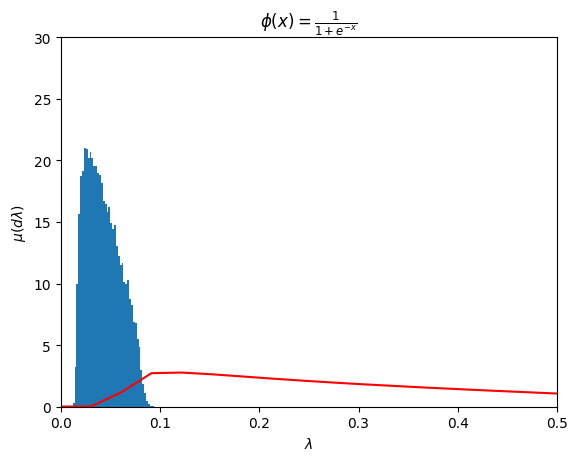

In [168]:
## testing for Sigmoid (with discrepany due to not fully accounting for g(z))

alpha = 6
psi = 1
d = 20
n = int(alpha * d)
N = 1500

## Example: Quadratic
phi = lambda x: 1 / (1 + np.exp(-x))
sigma = np.sqrt(0.293379)
theta2 = 0.206621**2
mu = 0.5

# Empirical Spectral Distribution
plt.figure(6)
plotEmpiricalMC(N, alpha, phi, d, False)
plotDensity(alpha, psi, sigma, theta2, mu, r'$\phi(x)=\frac{1}{1+e^{-x}}}$', 0, xmax*1.1, False)
plt.ylim(0,30);
plt.xlim(0,0.5);